In [ ]:
# Install library untuk membaca file Excel jika belum ada
!pip install openpyxl

# Import library yang diperlukan
import pandas as pd

# Unggah file ke Google Colab
from google.colab import files

print("Unggah file data_ready_final_v2.xlsx")
uploaded_excel = files.upload()

print("Unggah file hasil_klasifikasi.csv")
uploaded_csv = files.upload()

# Baca file Excel dan CSV
data_ready = pd.read_excel("data_ready_final_v2.xlsx")  # Sesuaikan sheet jika diperlukan
hasil_klasifikasi = pd.read_csv("hasil_klasifikasi.csv")

# Lakukan penggabungan berdasarkan kolom "judul" dan "Judul"
merged_data = data_ready.merge(
    hasil_klasifikasi[['Judul', 'Kategori']],
    left_on='judul',
    right_on='Judul',
    how='left'
)

# Drop kolom "Judul" dari hasil merge (opsional, jika tidak dibutuhkan)
merged_data.drop(columns=['Judul'], inplace=True)

# Simpan hasil ke file Excel baru
output_file = "data_ready_with_kategori.xlsx"
merged_data.to_excel(output_file, index=False)

print(f"Hasil penggabungan telah disimpan ke {output_file}")
files.download(output_file)


Unggah file data_ready_final_v2.xlsx


Saving data_ready_final_v2.xlsx to data_ready_final_v2 (1).xlsx
Unggah file hasil_klasifikasi.csv


Saving hasil_klasifikasi.csv to hasil_klasifikasi (1).csv
Hasil penggabungan telah disimpan ke data_ready_with_kategori.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Klasifikasi Teks Berita Menggunakan Model BERT dengan Evaluasi Kinerja Clusterin

Kode ini memberikan pendekatan sistematis untuk melakukan klasifikasi dan clustering pada teks berita menggunakan model BERT. Dengan memanfaatkan teknik embedding dari model BERT dan algoritma clustering KMeans, kode ini dapat membantu dalam mengidentifikasi kelompok-kelompok berita yang serupa, yang berguna dalam berbagai aplikasi seperti analisis tren, rekomendasi konten, dan pengelompokan informasi

In [ ]:
# Importing necessary libraries
from transformers import BertModel, BertTokenizer
from sklearn.cluster import KMeans
import torch
import numpy as np
import pandas as pd
import pickle

# Load data from Excel file
file_path = 'data_ready_with_kategori.xlsx'
data = pd.read_excel(file_path)

# Filter data to use the `text_berita` column for clustering
filtered_data = data[['judul']].dropna()

# Initialize BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Function to get embeddings for each document
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    # Take the mean of the embeddings from the last hidden state as document embedding
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings.flatten()

# Compute embeddings for each document in `text_berita`
embeddings = np.array([get_bert_embeddings(text) for text in filtered_data['judul']])

# Save embeddings to a pickle file
nmfile = 'judul_clean_embeddings.pkl'
with open(nmfile, 'wb') as file:
    pickle.dump(embeddings, file)
print("Embeddings berhasil disimpan ke file pickle.")

# Load embeddings from the pickle file (optional, for verification)
with open(nmfile, 'rb') as file:
    embeddings = pickle.load(file)
print("Embeddings berhasil dimuat dari file pickle.")

# Perform KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
filtered_data['cluster'] = labels

# Output results (displaying first 10 rows with text snippet and cluster label)
for idx, (text, label) in enumerate(zip(filtered_data['judul'][:10], labels[:10])):
    print(f"Document {idx} - Cluster {label}")
    print(f"Text: {text[:100]}...")  # Displaying a snippet of each text
    print("-" * 40)

# Save the DataFrame with cluster labels to a new Excel file
output_file = 'data_with_clusters_jdul.xlsx'
filtered_data.to_excel(output_file, index=False)
print(f"Data dengan cluster berhasil disimpan ke {output_file}.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Embeddings berhasil disimpan ke file pickle.
Embeddings berhasil dimuat dari file pickle.
Document 0 - Cluster 4
Text: Tak Mampu Bayar Iuran, Bisakah Menonaktifkan BPJS Kesehatan?...
----------------------------------------
Document 1 - Cluster 1
Text: Cara Pindah Faskes BPJS Kesehatan Online...
----------------------------------------
Document 2 - Cluster 4
Text: Dirut BPJS: Dokter Asing Boleh Layani Pasien BPJS Kesehatan, asal......
----------------------------------------
Document 3 - Cluster 0
Text: Sejahterakan Pekerja, BPJS Ketenagakerjaan Kucurkan MLT ke Pengembang untuk Bangun 200 Rumah Pekerja...
----------------------------------------
Document 4 - Cluster 0
Text: Tingkatkan Kualitas Layanan Faskes, BPJS Kesehatan Gandeng Kemenkes Kembangkan Telemedicine...
----------------------------------------
Document 5 - Cluster 0
Text: BPJS Kesehatan, Jaminan Kesehatan untuk Hari Ini dan Masa Mendatang...
----------------------------------------
Document 6 - Cluster 3
Text: Jokowi Kemb

# Reduksi Dimensi dan Visualisasi Hasil Clustering Teks Menggunakan PCA dan t-SNE

Kode ini bertujuan untuk melakukan reduksi dimensi pada embedding teks yang dihasilkan sebelumnya dan memvisualisasikannya menggunakan metode PCA (Principal Component Analysis) atau t-SNE (t-distributed Stochastic Neighbor Embedding)

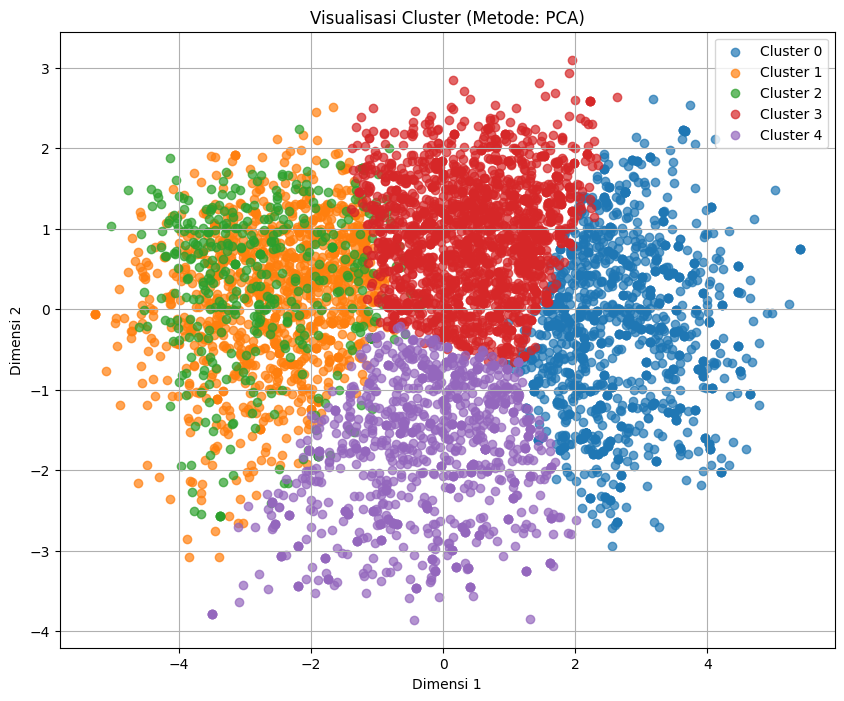

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Pilih metode reduksi dimensi: PCA atau t-SNE
def reduce_dimensions(embeddings, method='pca', n_components=2):
    if method == 'pca':
        reducer = PCA(n_components=n_components)
    elif method == 'tsne':
        reducer = TSNE(n_components=n_components, random_state=42, perplexity=30)
    else:
        raise ValueError("Metode reduksi dimensi tidak valid. Gunakan 'pca' atau 'tsne'.")

    reduced_embeddings = reducer.fit_transform(embeddings)
    return reduced_embeddings

# Reduksi dimensi embeddings menjadi 2D
method = 'pca'  # Ganti ke 'tsne' jika ingin menggunakan t-SNE
reduced_embeddings = reduce_dimensions(embeddings, method=method)

# Visualisasi scatter plot hasil clustering
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_points = reduced_embeddings[filtered_data['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.title(f'Visualisasi Cluster (Metode: {method.upper()})')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

# Fungsi evaluasi clustering
def evaluate_clustering(embeddings, labels):
    silhouette = silhouette_score(embeddings, labels)
    calinski_harabasz = calinski_harabasz_score(embeddings, labels)
    davies_bouldin = davies_bouldin_score(embeddings, labels)
    return silhouette, calinski_harabasz, davies_bouldin

# TF-IDF Clustering
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Bisa disesuaikan
tfidf_embeddings = tfidf_vectorizer.fit_transform(filtered_data['text_berita_clean']).toarray()

kmeans_tfidf = KMeans(n_clusters=num_clusters, random_state=42)
labels_tfidf = kmeans_tfidf.fit_predict(tfidf_embeddings)

tfidf_scores = evaluate_clustering(tfidf_embeddings, labels_tfidf)
print("TF-IDF Clustering Performance:")
print(f"Silhouette Score: {tfidf_scores[0]:.4f}")
print(f"Calinski-Harabasz Score: {tfidf_scores[1]:.4f}")
print(f"Davies-Bouldin Score: {tfidf_scores[2]:.4f}")

# Bag of Words Clustering
bow_vectorizer = CountVectorizer(max_features=1000)  # Bisa disesuaikan
bow_embeddings = bow_vectorizer.fit_transform(filtered_data['text_berita_clean']).toarray()

kmeans_bow = KMeans(n_clusters=num_clusters, random_state=42)
labels_bow = kmeans_bow.fit_predict(bow_embeddings)

bow_scores = evaluate_clustering(bow_embeddings, labels_bow)
print("\nBag of Words Clustering Performance:")
print(f"Silhouette Score: {bow_scores[0]:.4f}")
print(f"Calinski-Harabasz Score: {bow_scores[1]:.4f}")
print(f"Davies-Bouldin Score: {bow_scores[2]:.4f}")

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

# Cosine Similarity Clustering
cosine_sim_matrix = cosine_similarity(embeddings)
cosine_distance_matrix = 1 - cosine_sim_matrix  # Jarak 1 - Similarity

# Clustering menggunakan AgglomerativeClustering dengan parameter yang benar
agglomerative_clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='precomputed', linkage='average')
labels_cosine = agglomerative_clustering.fit_predict(cosine_distance_matrix)

cosine_scores = evaluate_clustering(embeddings, labels_cosine)
print("\nCosine Similarity Clustering Performance:")
print(f"Silhouette Score: {cosine_scores[0]:.4f}")
print(f"Calinski-Harabasz Score: {cosine_scores[1]:.4f}")
print(f"Davies-Bouldin Score: {cosine_scores[2]:.4f}")



In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduksi dimensi menggunakan PCA (2D)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualisasi hasil clustering dengan PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=labels_cosine, palette="Set2", s=100, alpha=0.7)

plt.title('Cosine Similarity Clustering - PCA Visualization', fontsize=16)
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
